## Netflix Analysis
### Phase 4 :Feature Engineering
### Name : Gagan Dhanapune
### gmail : gagandhanapune@gmail.com

### Objective Of This Milestone 
##### •	Analyze Netflix content growth over time.
##### •	Visualize the distribution of genres, ratings, and content type.
##### •	Identify country-level content contributions.
##### •	Create derived features such as “Content Length Category” and “Original vs. Licensed” (if derivable from dataset).


13/10/2025

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned_new.csv")

In [0]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
listed_in           0
description         0
duration_num        0
duration_type       3
dtype: int64

In [0]:
df.fillna('NA', inplace=True)

In [0]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Season


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   listed_in      8807 non-null   object 
 10  description    8807 non-null   object 
 11  duration_num   8807 non-null   float64
 12  duration_type  8807 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


In [0]:
df.shape

(8807, 13)

In [0]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
listed_in        0
description      0
duration_num     0
duration_type    0
dtype: int64

In [0]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.823095
std,8.819312,50.822520
min,1925.000000,0.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [0]:
df.count()

show_id          8807
type             8807
title            8807
director         8807
cast             8807
country          8807
date_added       8807
release_year     8807
rating           8807
listed_in        8807
description      8807
duration_num     8807
duration_type    8807
dtype: int64

10/10/2025


#### Feature Engineering

###### Feature engineering transforms raw Netflix data into meaningful, usable formats for analysis or modeling.

###### It helps convert messy text (like “90 min”, “Dramas, International Movies”) into numeric or categorical features.

###### New features like “Content Length Category” or “Original vs Licensed” reveal hidden trends.

###### Overall, it improves data quality, enhances insights, and boosts model performance.

In [0]:
# Converting 'date_added' to datetime allows for accurate extraction and manipulation of date components.
# Extracting year and month enables time-based analysis, such as content trends by year or month.
# This helps in understanding when content was added and identifying seasonal or yearly patterns.

In [0]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [0]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

categorizes numerical durations into "Short," "Medium," or "Long" based on predefined thresholds.

/home/spark-8cb89419-7d28-4641-bc37-18/.ipykernel/2458/command-8911052814186006-4014106451:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content_Length_Category', data=df, palette=palette)


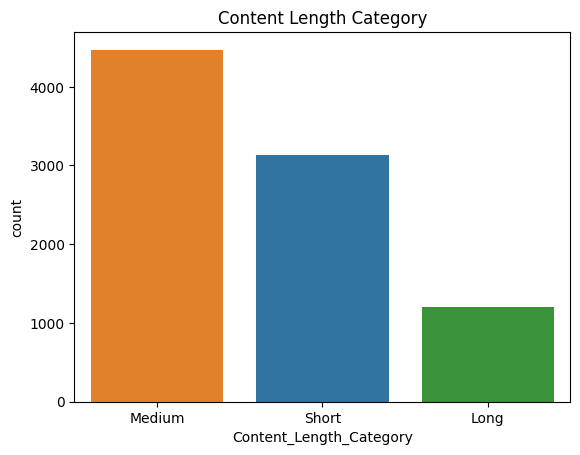

In [0]:
def length_category(duration):
    if duration < 60:
        return "Short"
    elif duration < 120:
        return "Medium"
    else:
        return "Long"

df['Content_Length_Category'] = df['duration_num'].apply(length_category)
palette = {"Short": "#1f77b4", "Medium": "#ff7f0e", "Long": "#2ca02c"}
sns.countplot(x='Content_Length_Category', data=df, palette=palette)
plt.title("Content Length Category")
plt.show()

In [0]:
# Group by year and content type
yearly_content = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

In [0]:
# Sort by year
content_growth = yearly_content.sort_index()

<Figure size 1200x600 with 0 Axes>

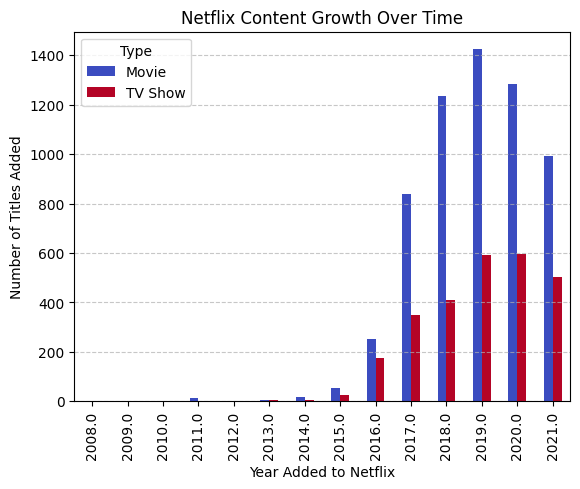

In [0]:
# Plotting the growth
plt.figure(figsize=(12,6))
content_growth.plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles Added")
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Visualize Netflix’s content growth trend over the years — separated by Movies and TV Shows.

Compare proportion of Netflix Originals vs Licensed content.

13/10/2025


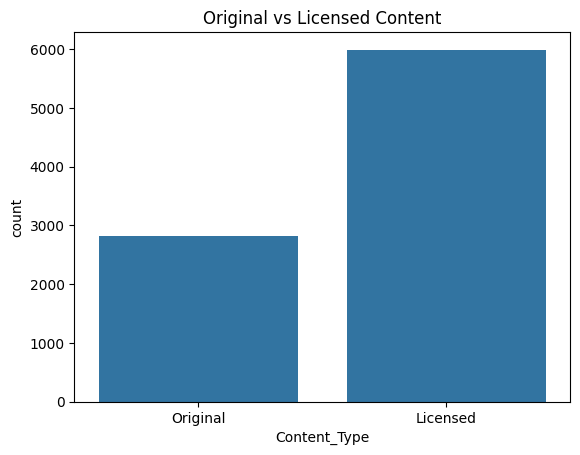

In [0]:
df['Content_Type'] = df['country'].apply(lambda x: 'Original' if x == 'United States' else 'Licensed')
sns.countplot(x='Content_Type', data=df)
plt.title("Original vs Licensed Content")
plt.show()


In [0]:
# Define mapping
age_group_map = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'TV-PG': 'Teens',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-14': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Unknown',
    'Unknown': 'Unknown'
}

In [0]:
df['Content_Age_Group'] = df['rating'].map(age_group_map).fillna('Unknown')

Adults     70.0
Teens      18.6
Kids       10.2
Unknown     1.1
Name: Content_Age_Group, dtype: float64

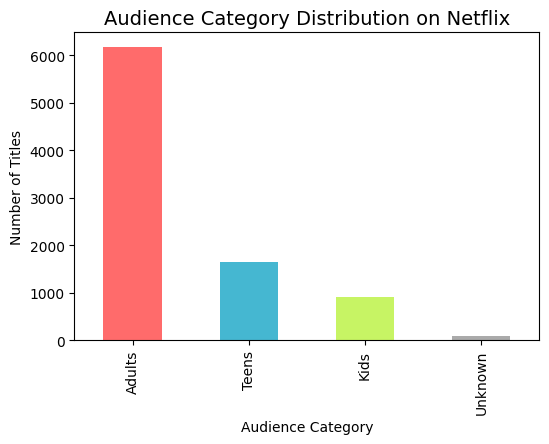

In [0]:
audience_counts = df['Content_Age_Group'].value_counts()
audience_percent = round((audience_counts / audience_counts.sum()) * 100, 1)

display(audience_percent)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
audience_counts.plot(kind='bar', color=['#FF6B6B', '#45B7D1', '#C7F464', '#AAAAAA'])
plt.title("Audience Category Distribution on Netflix", fontsize=14)
plt.xlabel("Audience Category")
plt.ylabel("Number of Titles")
plt.show()

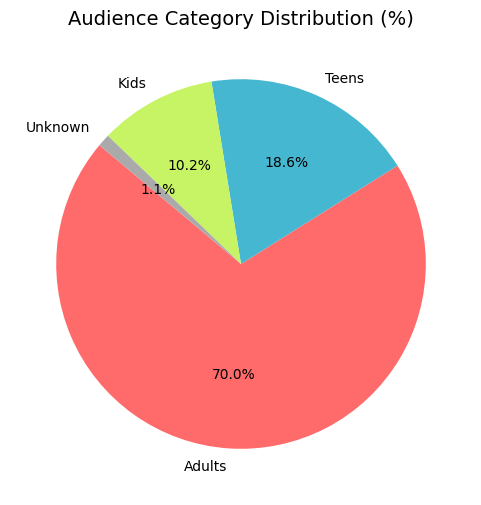

In [0]:
# Pie Chart for Audience Categories
audience_counts = df['Content_Age_Group'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(audience_counts, labels=audience_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#45B7D1', '#C7F464', '#AAAAAA'], startangle=140)
plt.title("Audience Category Distribution (%)", fontsize=14)
plt.show()


In [0]:
# define region mapping
region_map = {
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'China': 'Asia',
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
}


In [0]:
# Function to get region
def get_region(country):
    for key in region_map.keys():
        if key in country:
            return region_map[key]
    return "Unknown"


In [0]:
# Apply mapping
df['Region'] = df['country'].apply(get_region)

/home/spark-8cb89419-7d28-4641-bc37-18/.ipykernel/2458/command-6302434734138311-1286704990:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


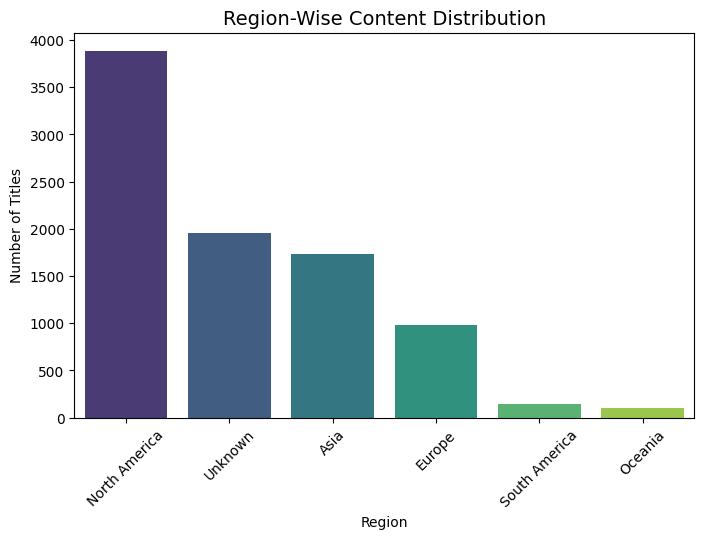

In [0]:
# Region-wise content distribution
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Region-Wise Content Distribution", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


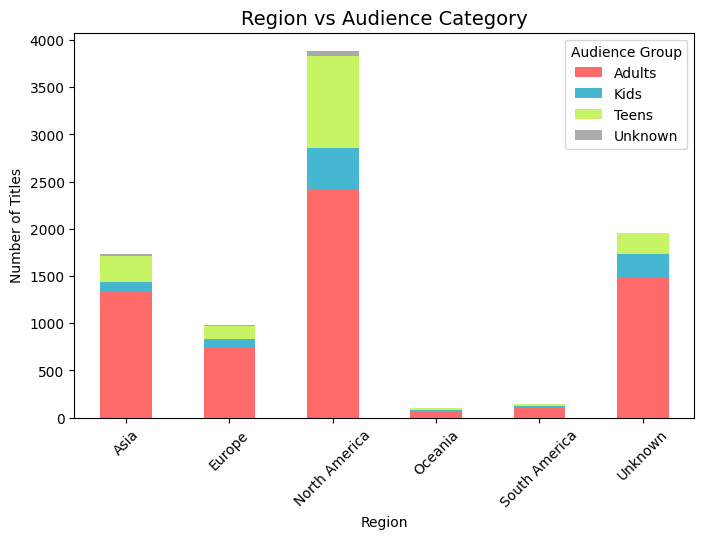

In [0]:
# Cross-tab region and age group
region_audience = pd.crosstab(df['Region'], df['Content_Age_Group'])

region_audience.plot(kind='bar', stacked=True, figsize=(8,5),
                     color=['#FF6B6B', '#45B7D1', '#C7F464', '#AAAAAA'])
plt.title("Region vs Audience Category", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Audience Group")
plt.show()
